In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
tensorflow.__version__

'2.6.0'

In [ ]:
pip install wordcloud

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
#Loading data
path = '/content/drive/MyDrive/input_data(3).xlsx'
data = pd.read_excel(path)

In [ ]:
data.head(10)

Short description  ... Assignment group
0                                        login issue  ...            GRP_0
1                                            outlook  ...            GRP_0
2                                 cant log in to vpn  ...            GRP_0
3                      unable to access hr_tool page  ...            GRP_0
4                                       skype error   ...            GRP_0
5     unable to log in to engineering tool and skype  ...            GRP_0
6  event: critical:HostName_221.company.com the v...  ...            GRP_1
7  ticket_no1550391- employment status - new non-...  ...            GRP_0
8               unable to disable add ins on outlook  ...            GRP_0
9                    ticket update on inplant_874773  ...            GRP_0

[10 rows x 4 columns]

In [ ]:
data.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

In [ ]:
data.shape

(8500, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


Total Rows = 8500 rows
Short Description contains 8492 rows 
Missing 8 rows

Similar way,
Description missing 1 row

Caller and Assignment group has no rows missing (blank)

In [ ]:
# Data Cleaning
data.fillna(" ", inplace = True)

In [ ]:
data[data.duplicated()]

Short description  ... Assignment group
51                           call for ecwtrjnq jpecxuty  ...            GRP_0
229                          call for ecwtrjnq jpecxuty  ...            GRP_0
493                     ticket update on inplant_872730  ...            GRP_0
512                                    blank call //gso  ...            GRP_0
667   job bkbackup_tool_powder_prod_full failed in j...  ...            GRP_8
...                                                 ...  ...              ...
7836             probleme mit erpgui \tmqfjard qzhgdoua  ...           GRP_24
8051               issue on pricing in distributor_tool  ...           GRP_21
8093  reset passwords for prgthyuulla ramdntythanjes...  ...           GRP_17
8347                           blank call // loud noise  ...            GRP_0
8405                           unable to launch outlook  ...            GRP_0

[83 rows x 4 columns]

In [ ]:
# Removing duplicates
data = data.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'])

In [ ]:
# Caller coloumn does not provide with useful data, so can be dropped.
callers = data['Caller'].unique()
data.drop(columns='Caller', inplace=True)
data.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 3 columns]

In [ ]:
# Definining a function to clean the data
import re
import sys
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False
        
def clean_data(text):
    text = text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text) 
    text = re.sub(r'\S*@\S*\s?', '', text) 
    text = re.sub(r'\d+','' ,text) 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities
    text = re.sub(r'\&\w*;', '', text)

    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters
    # Remove extra spaces
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [ ]:
#Applying the above function on the Description
data['Description'] = data['Description'].apply(clean_data)
data.head(15)

Short description  ... Assignment group
0                                         login issue  ...            GRP_0
1                                             outlook  ...            GRP_0
2                                  cant log in to vpn  ...            GRP_0
3                       unable to access hr_tool page  ...            GRP_0
4                                        skype error   ...            GRP_0
5      unable to log in to engineering tool and skype  ...            GRP_0
6   event: critical:HostName_221.company.com the v...  ...            GRP_1
7   ticket_no1550391- employment status - new non-...  ...            GRP_0
8                unable to disable add ins on outlook  ...            GRP_0
9                     ticket update on inplant_874773  ...            GRP_0
10  engineering tool says not connected and unable...  ...            GRP_0
11            hr_tool site not loading page correctly  ...            GRP_0
12  unable to login to hr_tool to sgxqsuojr xwbeso...  ...            GRP_0
13                   user wants to reset the password  ...            GRP_0
14                           unable to open payslips   ...            GRP_0

[15 rows x 3 columns]

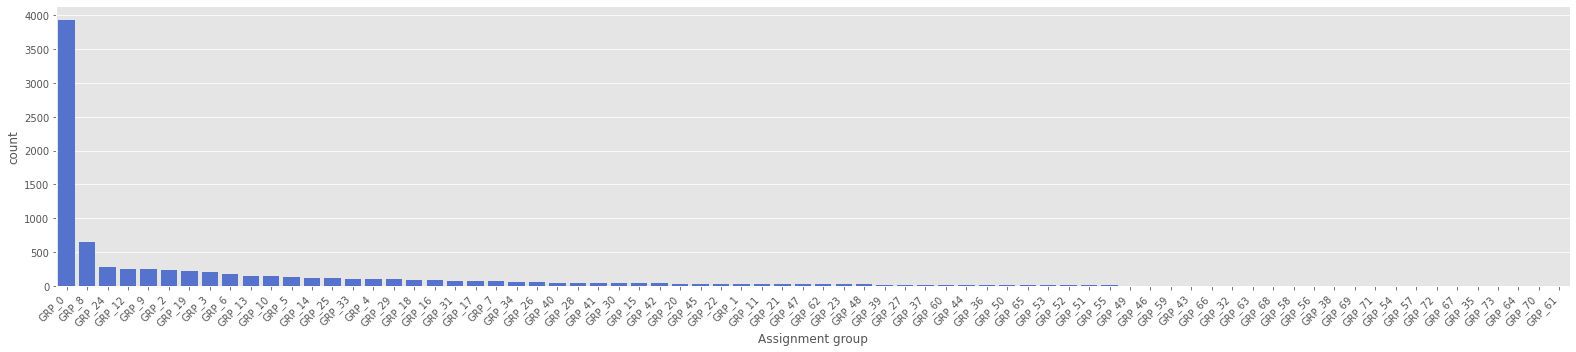

In [ ]:
desc_order = data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=data, color='royalblue',order=desc_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
ticket = pd.DataFrame(data['Assignment group'].value_counts())
ticket

Assignment group
GRP_0               3934
GRP_8                645
GRP_24               285
GRP_12               257
GRP_9                252
...                  ...
GRP_64                 1
GRP_67                 1
GRP_35                 1
GRP_73                 1
GRP_61                 1

[74 rows x 1 columns]

In [ ]:
ticket = ticket.T
data['Ag_Count'] = data.apply(lambda row: ticket[row['Assignment group']], axis = 1)
data.loc[data['Ag_Count'] <=100, "Assignment group"] = "Group_A"

In [ ]:
# Merging short description into Description
data['Description'] = data['Short description'] + ' '+ data['Description']
data.drop(columns=['Short description','Ag_Count'],inplace=True)
data.head()

Description Assignment group
0  login issue verified user details employee and...            GRP_0
1  outlook hello team my meetings skype meetings ...            GRP_0
2    cant log in to vpn hi cannot log on to vpn best            GRP_0
3  unable to access hr_tool page unable to access...            GRP_0
4                           skype error  skype error            GRP_0

Explorarary Data Analysis


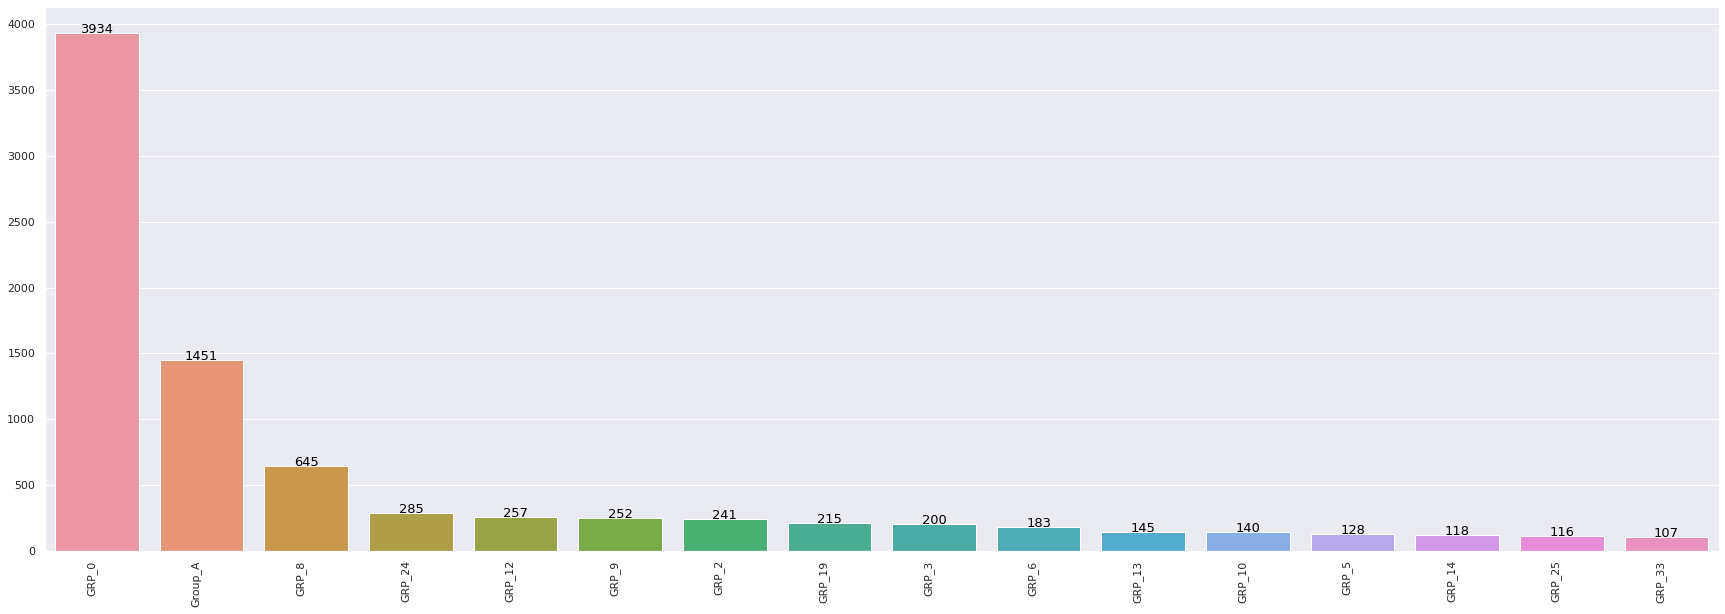

In [ ]:
sns.set_theme();
 
distr = data['Assignment group'].value_counts()
plt.figure(figsize=(30,10))
 
cntplot = sns.barplot(x=distr.index,y=distr.values)
cntplot.set_xticklabels(cntplot.get_xticklabels(), rotation=90, ha="right")
for i in range(len(distr)):
  cntplot.text(i, distr.values[i], distr.values[i], color='black', ha='center', fontsize=13)
plt.show()

Extremely right skewed because of GRP_0

In [ ]:
#Description Length data
data['len'] = data['Description'].str.len()

Text(0.5, 1.0, 'Length of descriptions')

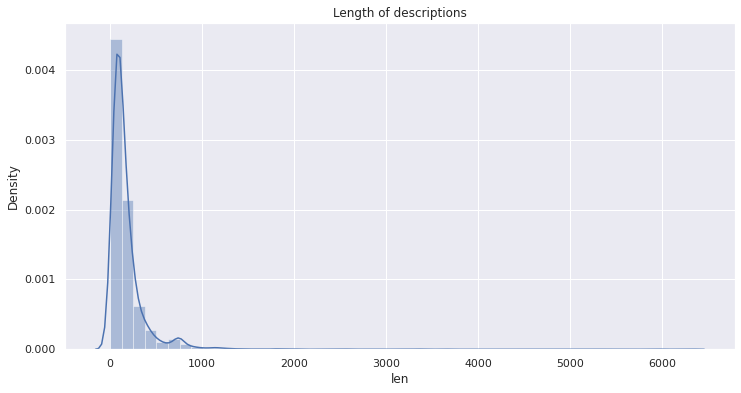

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data['len']).set_title('Length of descriptions')

Text(0.5, 1.0, 'Length of descriptions')

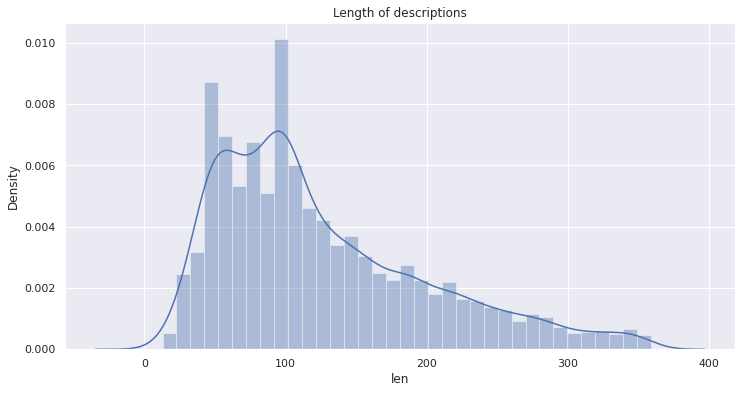

In [ ]:
#90th percentile
data0 = data[data['len'] < data['len'].quantile(0.90)]
plt.figure(figsize=(12,6))
sns.distplot(data0['len']).set_title('Length of descriptions')

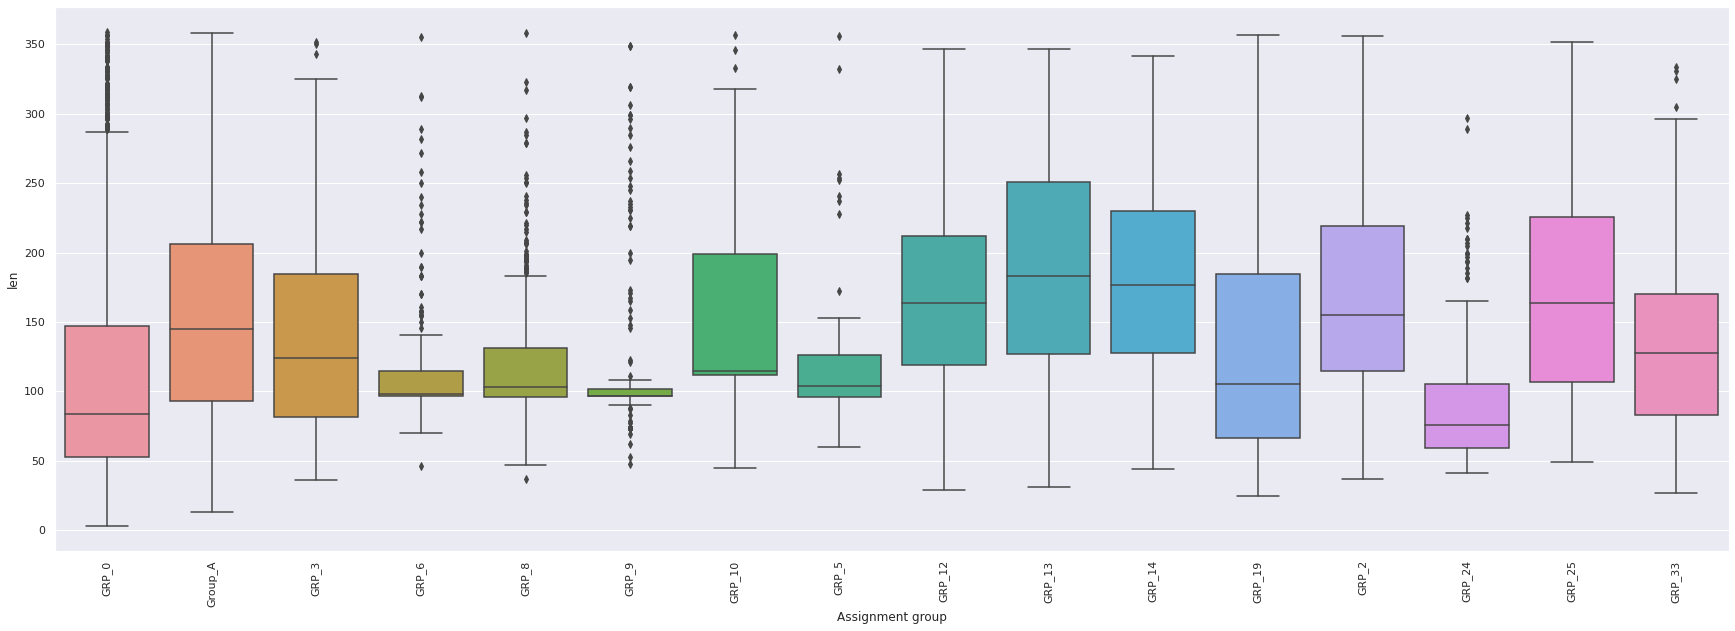

In [ ]:
#Boxplot 
plt.figure(figsize=(30,10))
lengths = sns.boxplot(data=data0, x='Assignment group', y='len')
lengths.set_xticklabels(lengths.get_xticklabels(),rotation=90)
plt.show()

Maximum of Outliers lie in upper range of the lengths

In [ ]:
data.head()

Description Assignment group  len
0  login issue verified user details employee and...            GRP_0  204
1  outlook hello team my meetings skype meetings ...            GRP_0  142
2    cant log in to vpn hi cannot log on to vpn best            GRP_0   47
3  unable to access hr_tool page unable to access...            GRP_0   59
4                           skype error  skype error            GRP_0   24

In [ ]:
#Dropping 'len' from our dataset 
data.drop(columns=['len'],inplace=True)
data.head()

Description Assignment group
0  login issue verified user details employee and...            GRP_0
1  outlook hello team my meetings skype meetings ...            GRP_0
2    cant log in to vpn hi cannot log on to vpn best            GRP_0
3  unable to access hr_tool page unable to access...            GRP_0
4                           skype error  skype error            GRP_0

Text Pre-processing


In [ ]:
#Lemmatization and stop words removal
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

sr = stopwords.words('english') 
# There are some extra words which need stopping after checking the word cloud. So,
newStopWords = ['please','yes','na','hello','help','hi','thanks','greeting','from']
sr.extend(newStopWords)

for i,text in enumerate(data['Description']):
  data['Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)

# install spacy
!pip install -q spacy 
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

data['Description'] = data['Description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
data.head(10)

Description Assignment group
0  login issue verify user detail employee manage...            GRP_0
1  outlook team meeting skype meeting etc appear ...            GRP_0
2               can not log vpn can not log vpn best            GRP_0
3  unable access hr_tool page unable access hr to...            GRP_0
4                          skype error   skype error            GRP_0
5  unable log engineering tool skype unable log e...            GRP_0
6  event : critical : hostname_221.company.com va...          Group_A
7  ticket_no1550391- employment status - new non ...            GRP_0
8  unable disable add ins outlook unable disable ...            GRP_0
9  ticket update inplant_874773 ticket update inp...            GRP_0

In [ ]:
#Word Cloud
from wordcloud import WordCloud
def generate_word_clod(corpus,x):
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='black', 
                    stopwords=sr,
                    min_font_size = 10).generate(corpus)

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis("off")
    plt.title("Most common words of {}".format(x)) 
    plt.tight_layout(pad = 0) 
    plt.show()

In [ ]:
value = data['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'Group_A', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2',
       'GRP_19', 'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14',
       'GRP_25', 'GRP_33'],
      dtype='object')

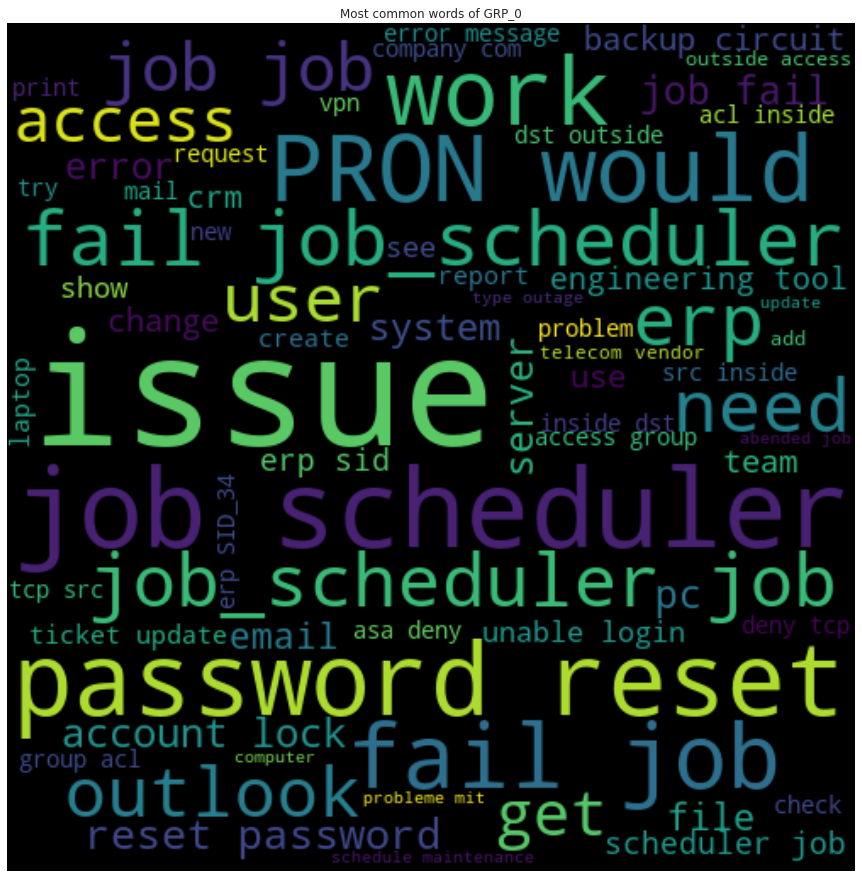

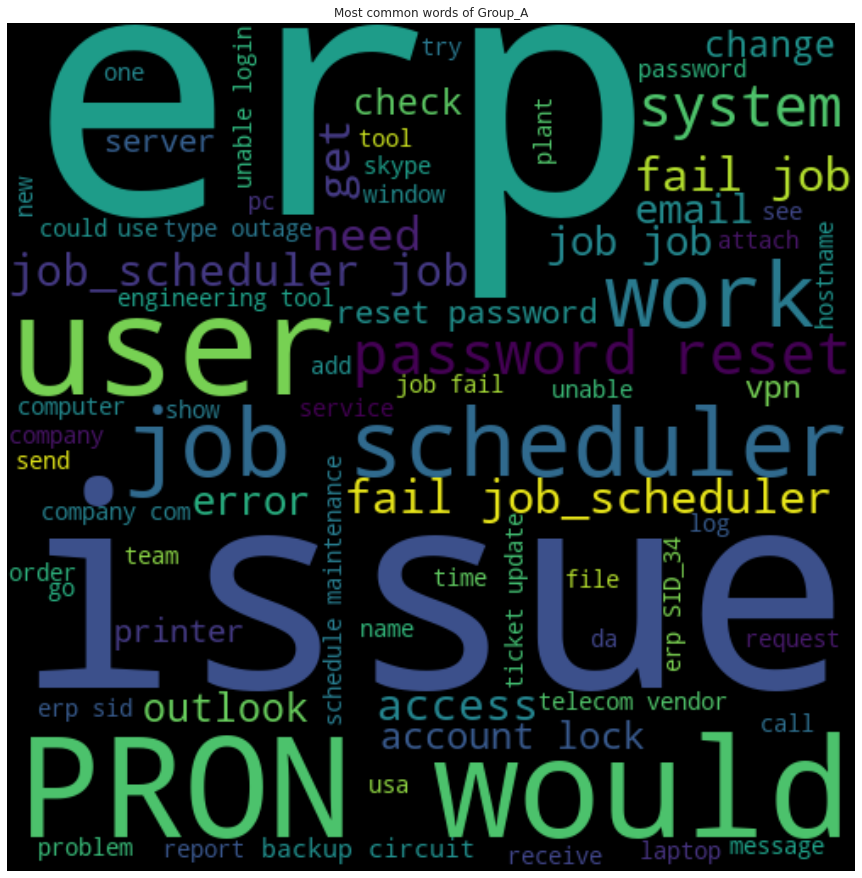

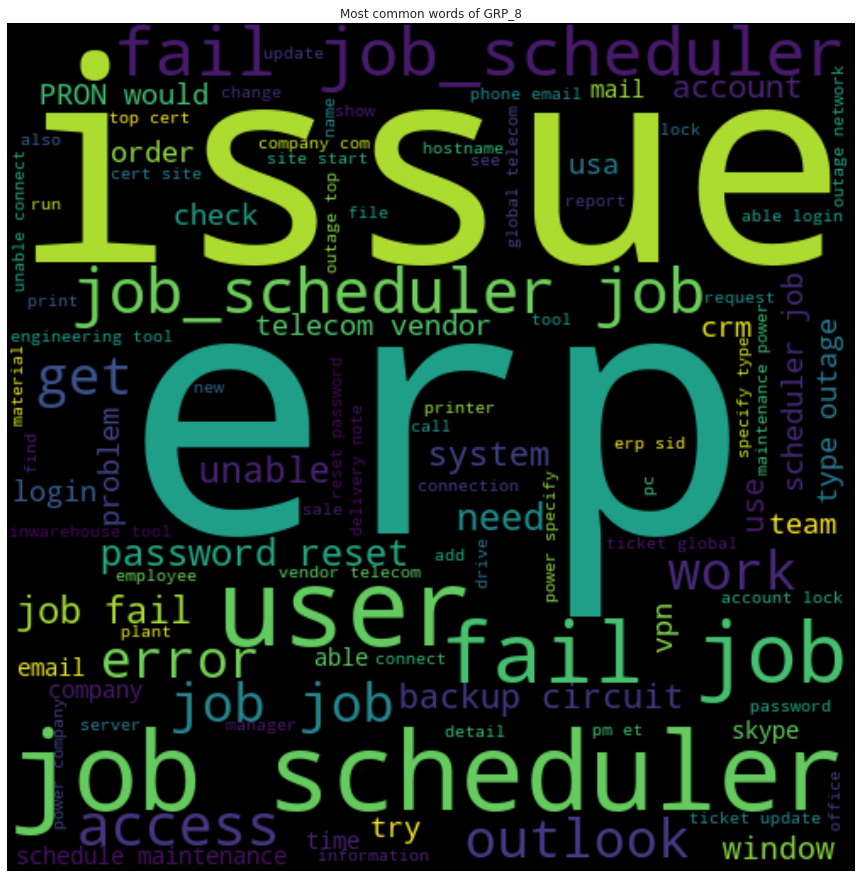

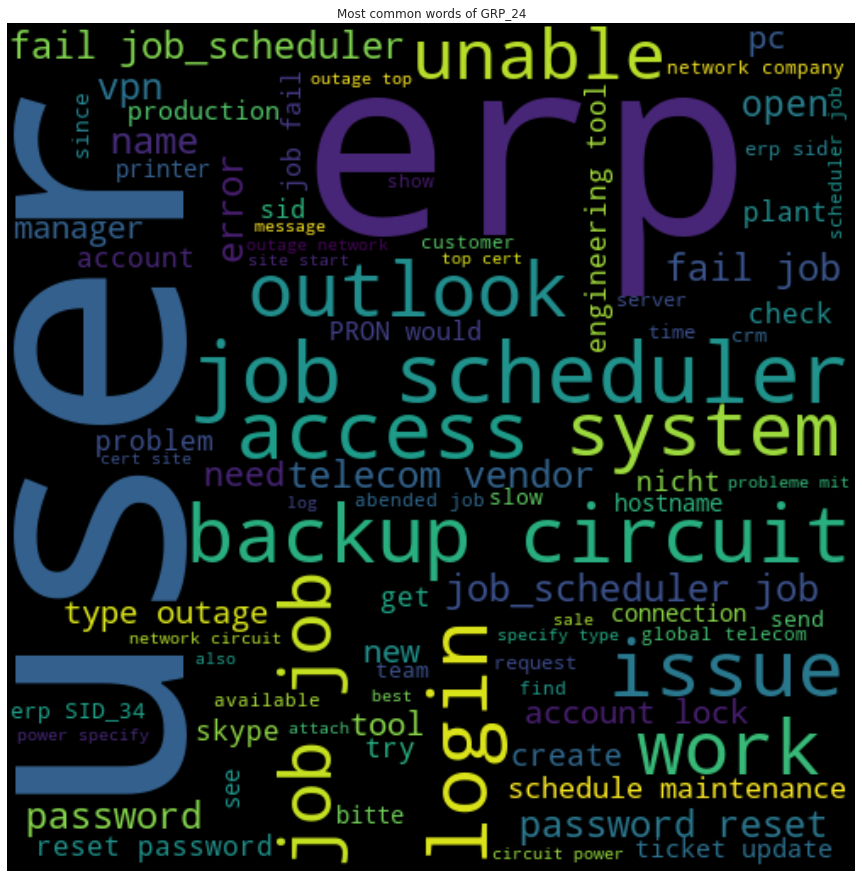

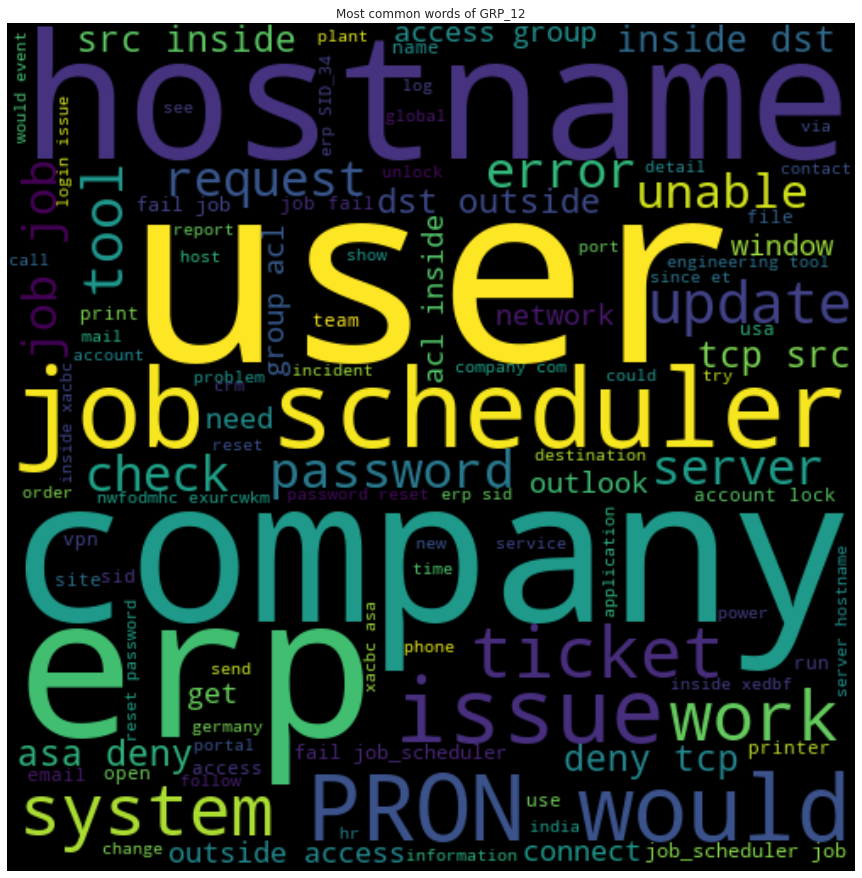

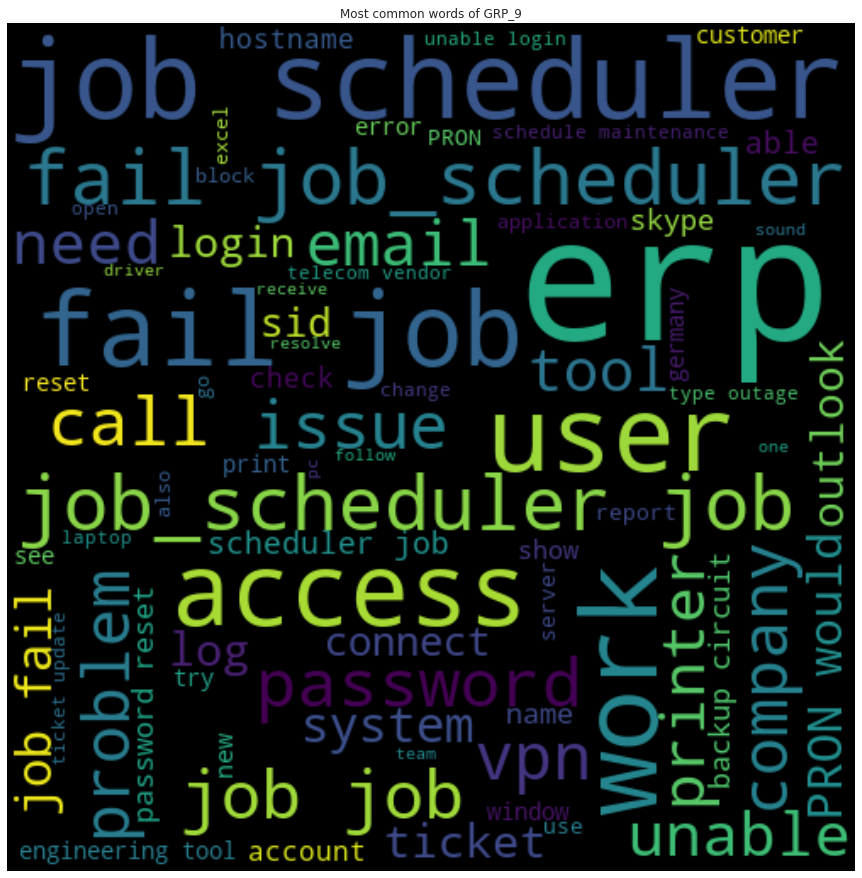

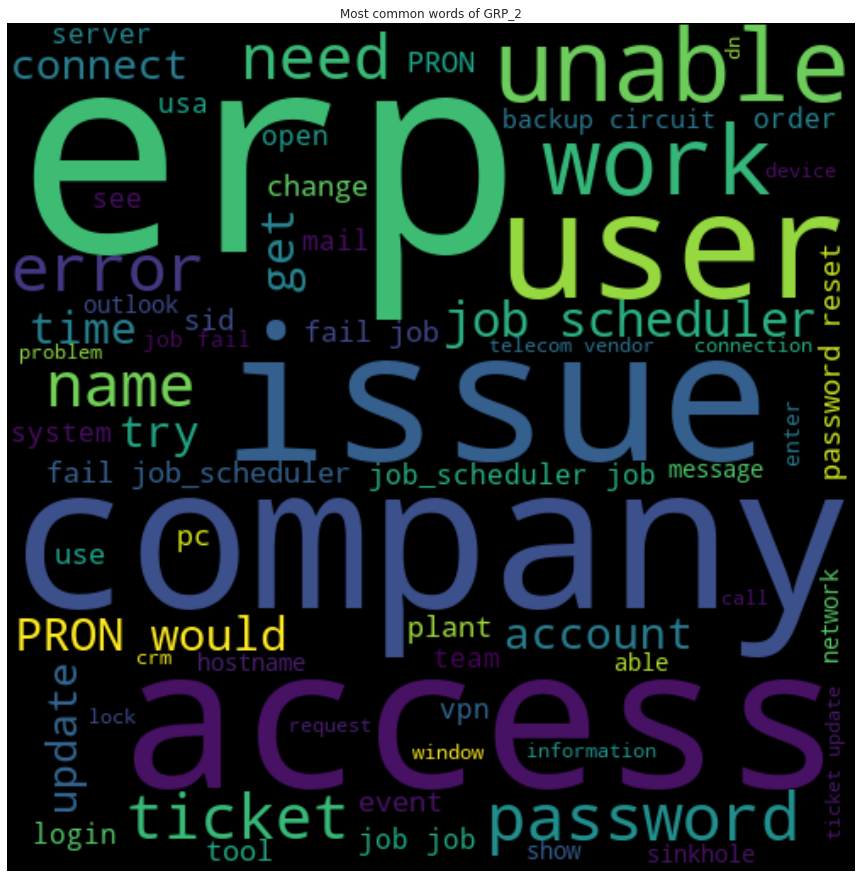

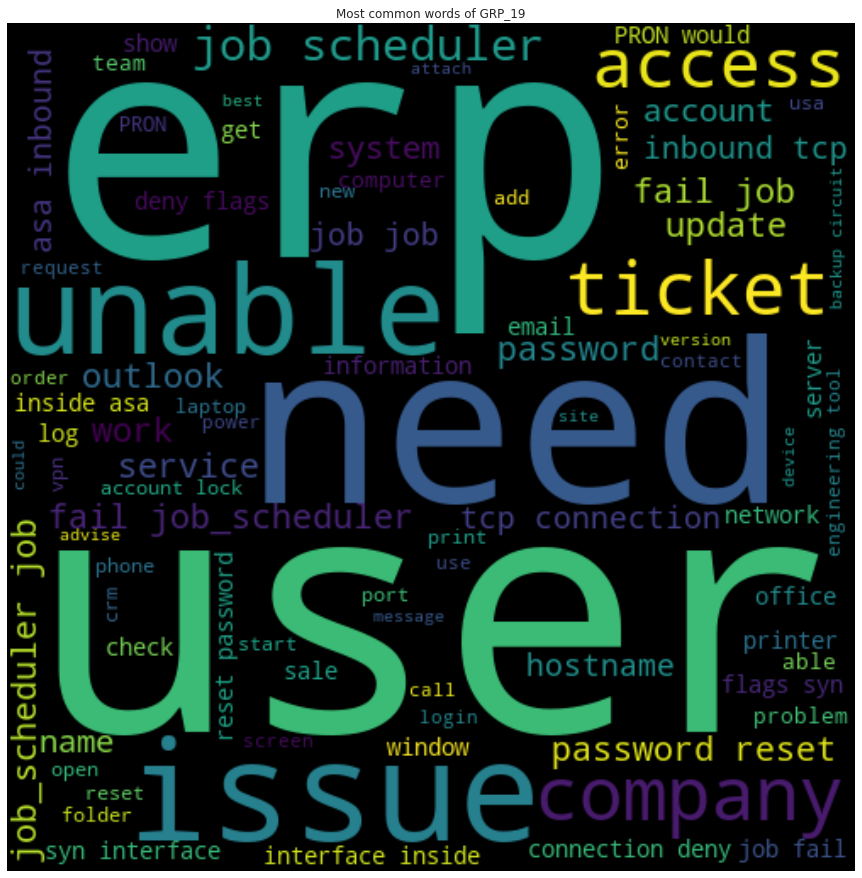

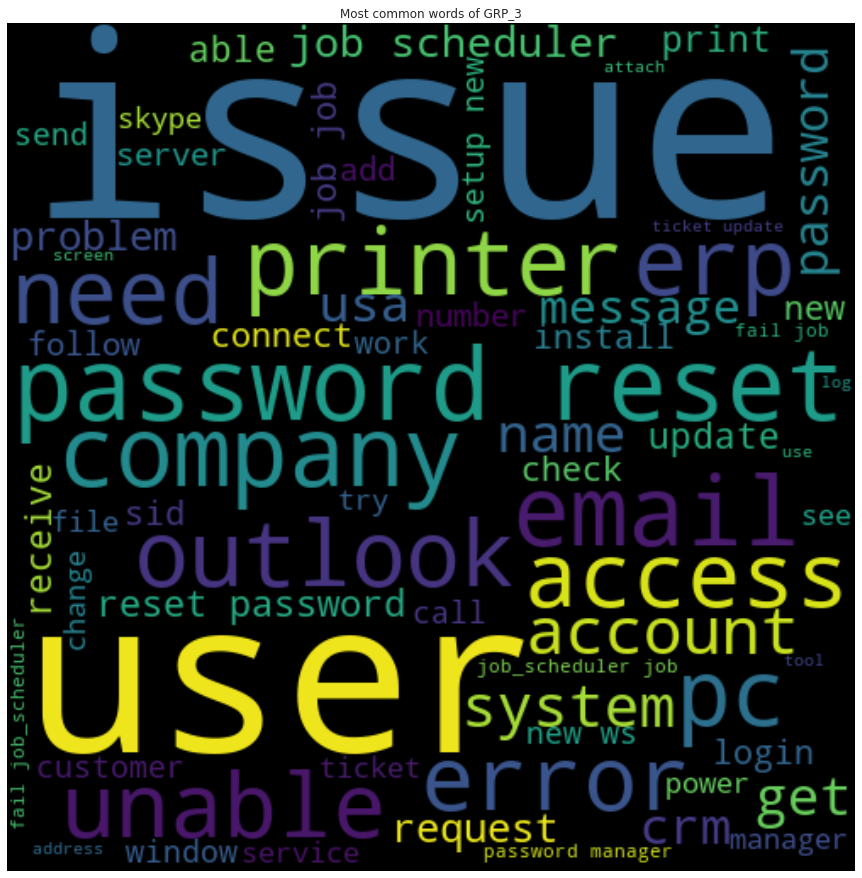

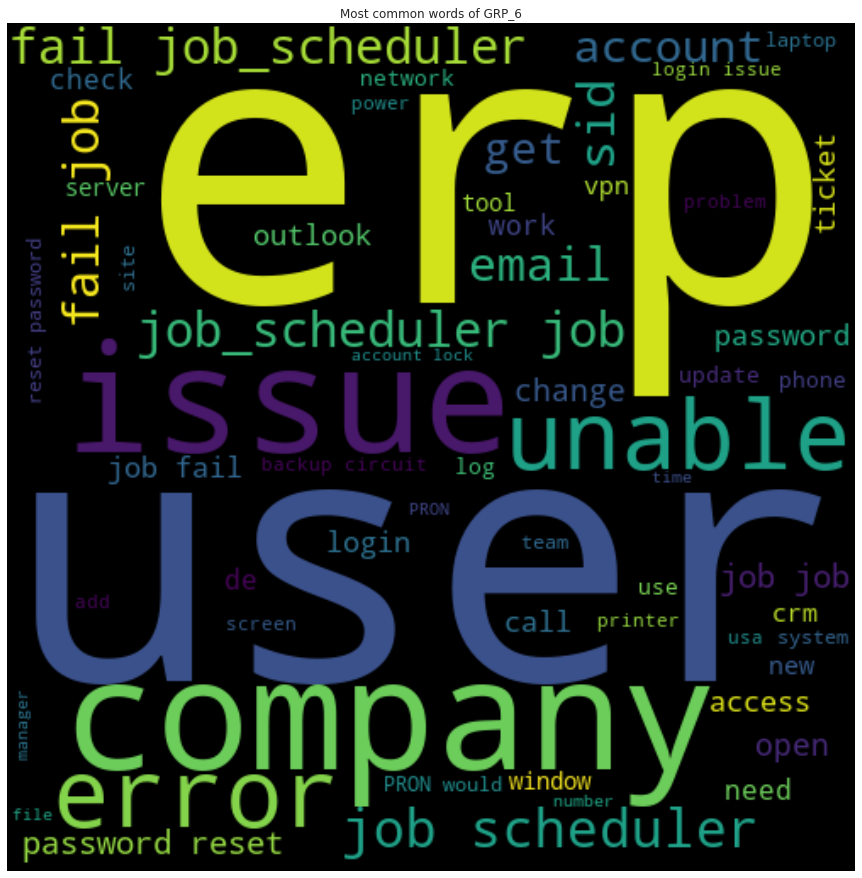

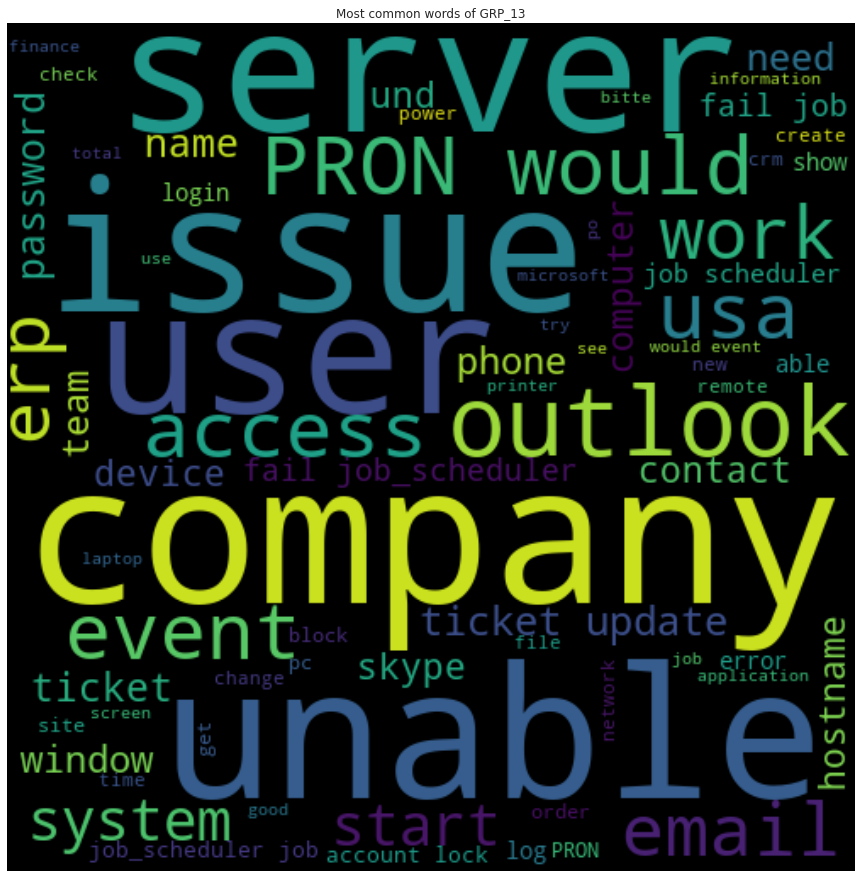

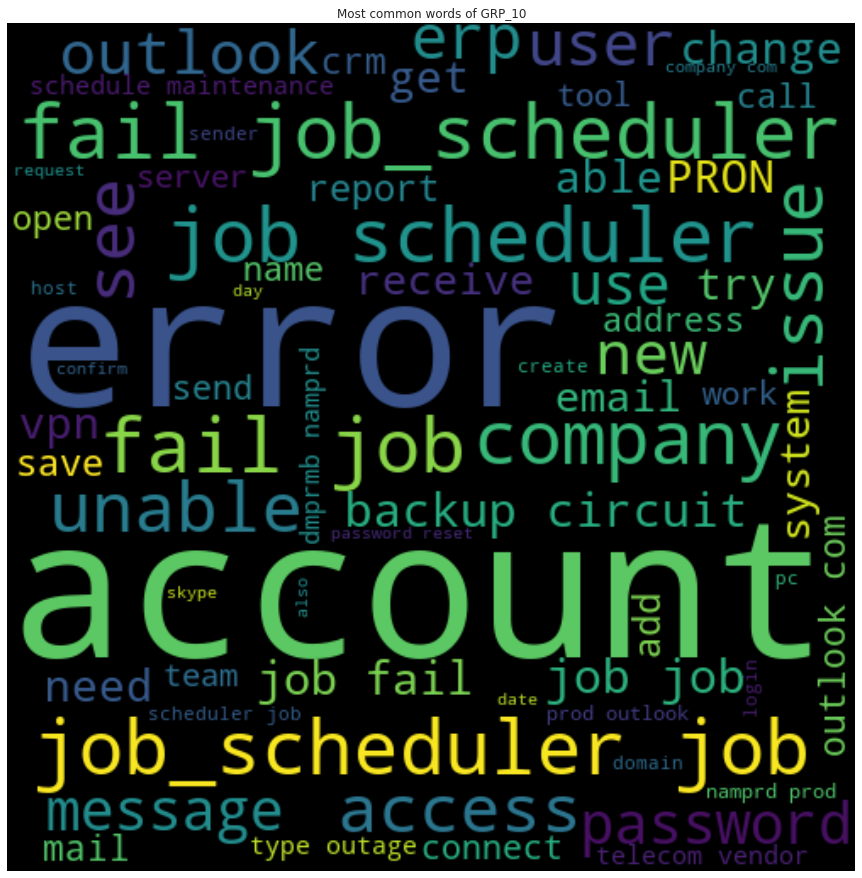

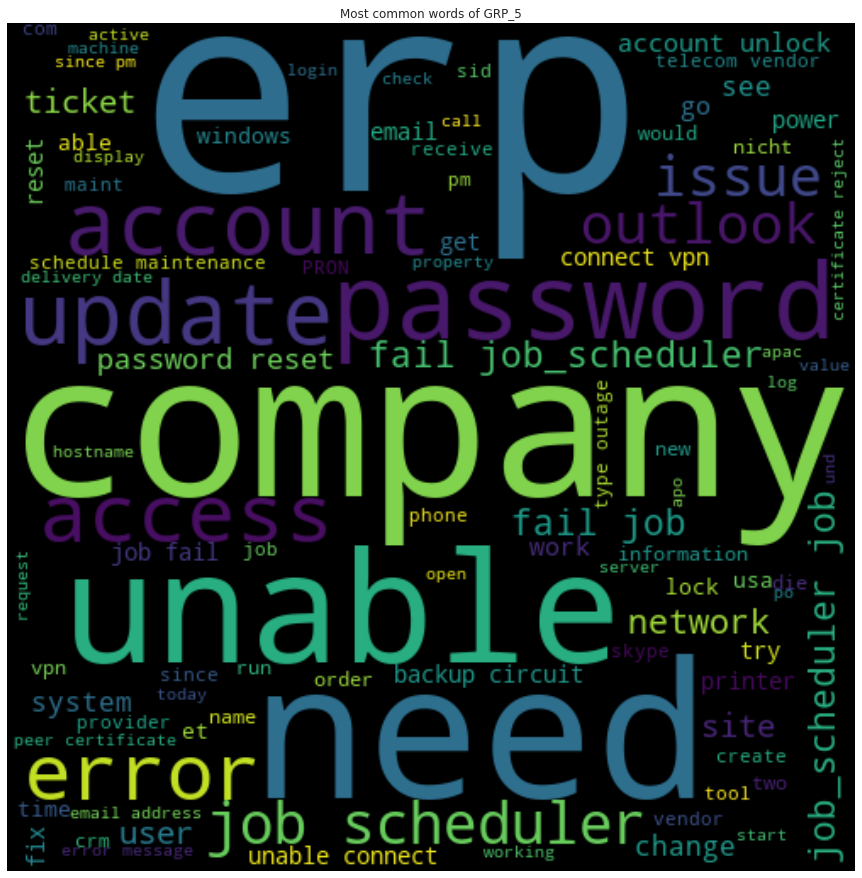

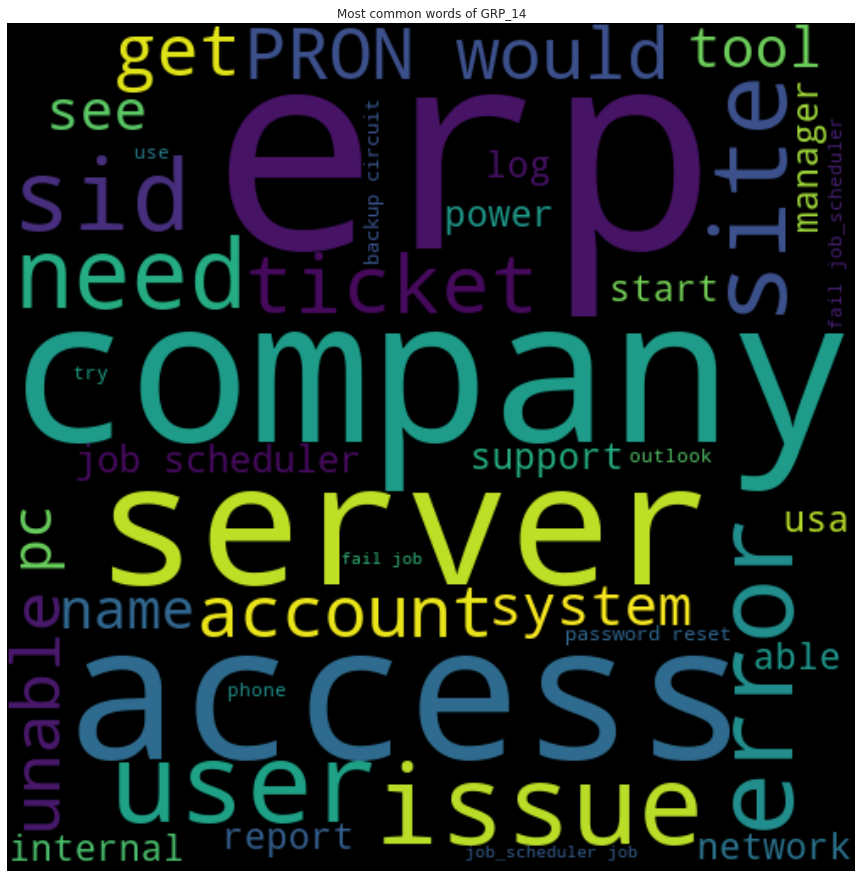

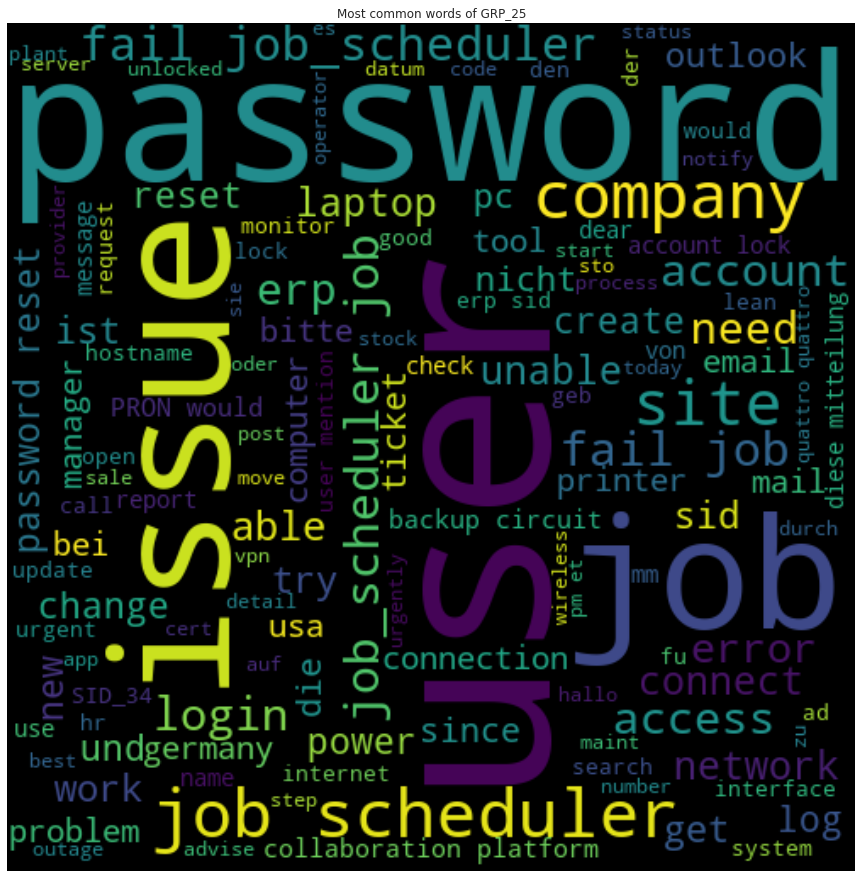

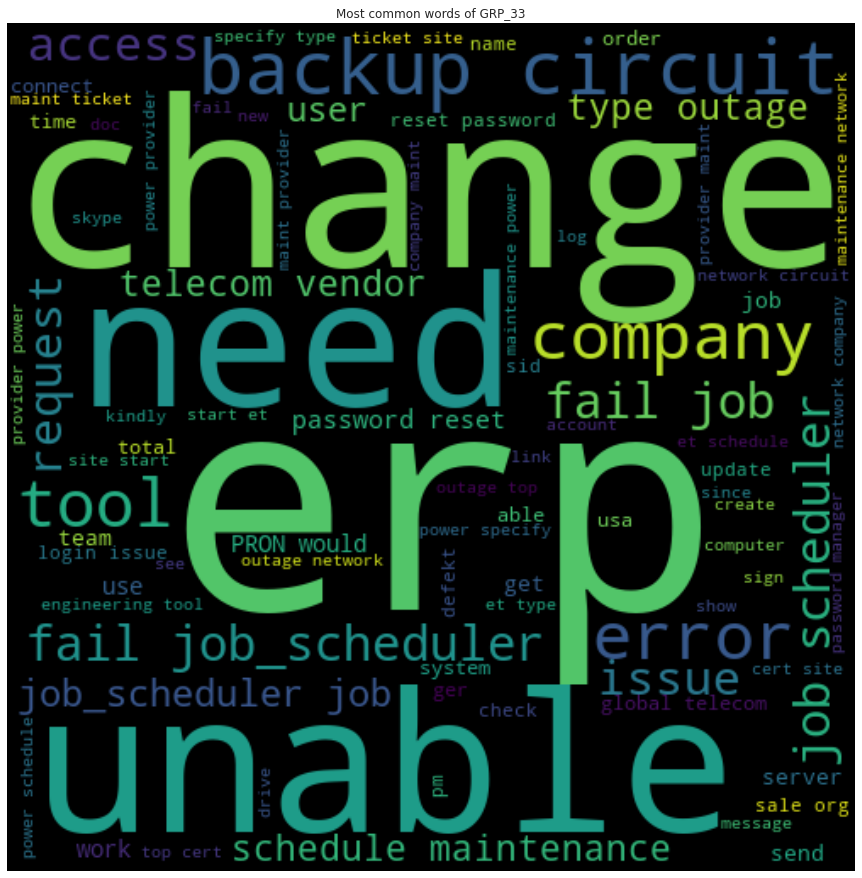

In [ ]:
for i in range(16):
    generate_word_clod(' '.join(data[data['Assignment group'] == value[i]].Description.str.strip()),value[i])

In [ ]:
#Converting the cleaned dataframe to a csv file for Model Building 
data.to_csv (r'/content/drive/My Drive/cleaned_input_data.csv', index = False, header=True)

Model Building 

Now we need to proceed with different models so that we can validate the best model based on accuracy

In [ ]:
#Creating a target column
data['Target'] = data['Assignment group'].astype('category').cat.codes
data.info()

#Creating a copy of the dataset
data_copy = data.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8417 non-null   object
 1   Assignment group  8417 non-null   object
 2   Target            8417 non-null   int8  
dtypes: int8(1), object(2)
memory usage: 525.5+ KB


In [ ]:
#Inserting Classifiers we will use for our dataset.
import warnings

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split

In [ ]:
#Creating training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(data_copy.Description, 
                                                    data_copy.Target, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [ ]:
#Our Model will be built on a common function
def classifier(Prediction_model, X_train, X_test, y_train, y_test, pipelineRequired=True, isDeepModel=False):
    clf = Prediction_model

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', Prediction_model),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1)

        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Model:', Prediction_model)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,value,value)
    plt.figure(figsize=(20,10))  
    sns.heatmap(cm_df, annot=True)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))

Random Forest Classifier

Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Training accuracy: 95.11%
Testing accuracy: 42.16%
Confusion matrix:
 [[680   3   1   1   3   5   1   2   1   2   2   2   2  12   3  63]
 [ 24   1   0   0   0   1   1   0   0   0   0   0   0   1   1   2]
 [ 56   0   0   0   0   0   0   1   0   0   1   0   1   2   0   1]
 [ 27   0   0   0   1   1   0   0   0   0   0   0   0   1   0   5]
 [ 22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3]
 [ 29   0   0   0   0   0   0   0   1   0

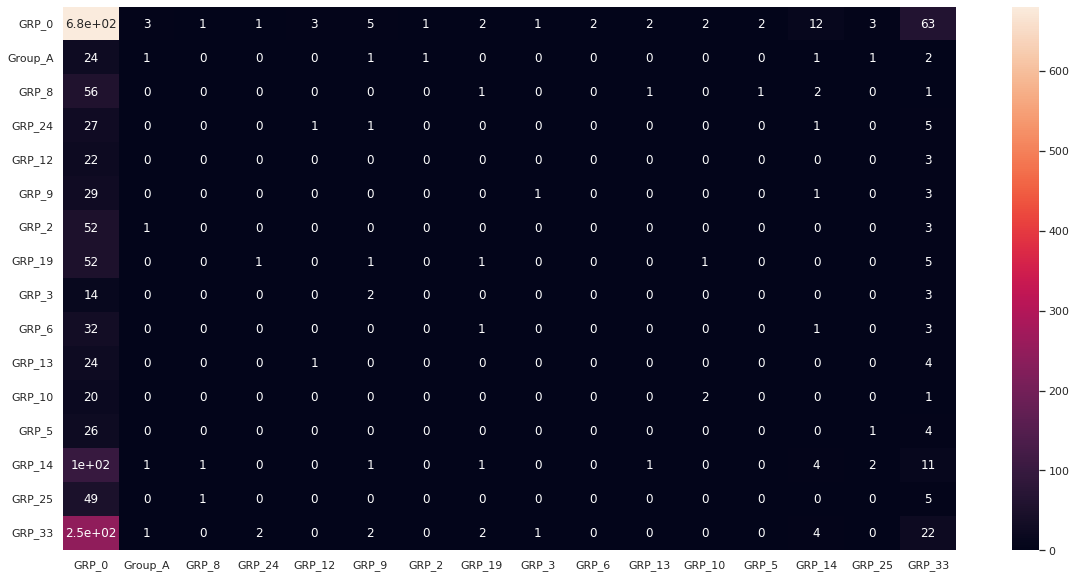

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Decision Tree Classifier

Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Training accuracy: 95.11%
Testing accuracy: 32.01%
Confusion matrix:
 [[455   9  16   7   7  14  11  17   8  14   7  14  17  29  12 146]
 [ 18   1   0   0   0   1   1   1   0   0   2   0   1   2   2   2]
 [ 29   0   2   1   1   2   2   3   1   1   0   1   2   8   1   8]
 [ 18   1   1   1   1   1   1   0   0   1   0   0   0   1   0   9]
 [ 17   0   0   0   0   0   1   0   0   0   0   0   0   1   1   5]
 [ 12   0   0   1   0   0   1   0   1   0   0   1   3   4   1  10]
 [ 37   1   0   0   0   0   0   1   1   1   0   1   1   2   1  10]
 [ 33   0   0   0   0   4  

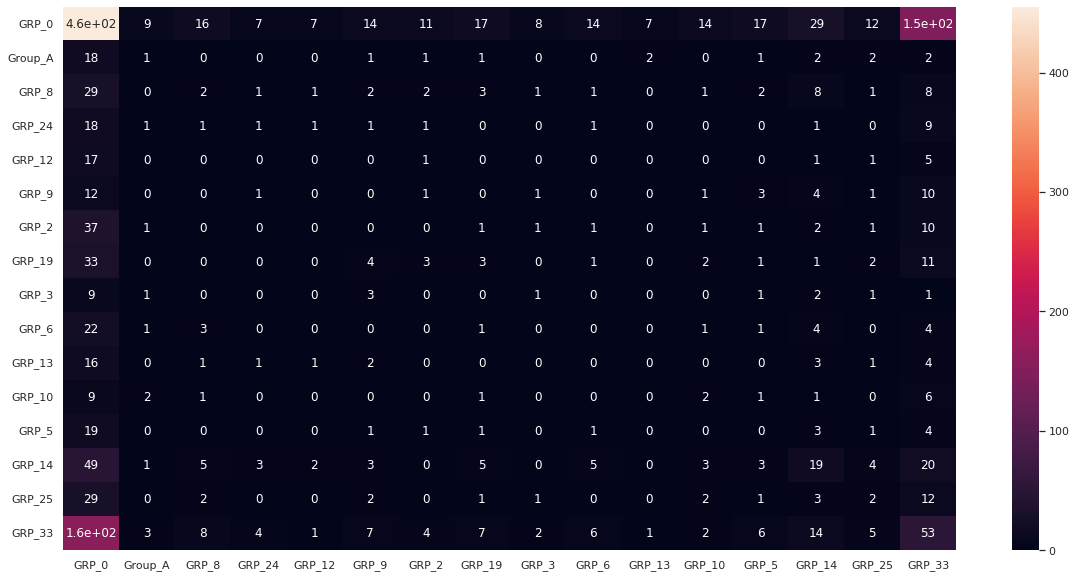

In [ ]:
classifier(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Support Vector Machine (SVM)

Linear

Model: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Training accuracy: 80.22%
Testing accuracy: 41.03%
Confusion matrix:
 [[653   1   3   0   1   2   1   5   0   4   1   2   2  25   3  80]
 [ 25   1   0   0   0   1   0   0   0   0   0   0   0   0   1   3]
 [ 46   0   0   0   0   0   0   2   1   0   1   1   0   5   1   5]
 [ 23   0   0   0   0   0   1   0   0   0   0   1   0   2   0   8]
 [ 20   0   0   0   0   0   0   0   0   0   0   0   0   1   0   4]
 [ 24   0   0   0   0   0   0   0   0   0   0   1   1   2   0   6]
 [ 50   0   0   1   0   0   0   1   0   0   0   0   0   0   0   4]
 [ 50   0   0   1   0   1   0   1   0   1   0   0   0   1   0   6]
 [ 12   0   0   0   0   0   0   0   0   1   0   0   0   1   0   5]
 [ 29   0   0   1   0   0   0   1   0   0   0   0   0   0   0   6]
 [ 27   0   0   0   0  

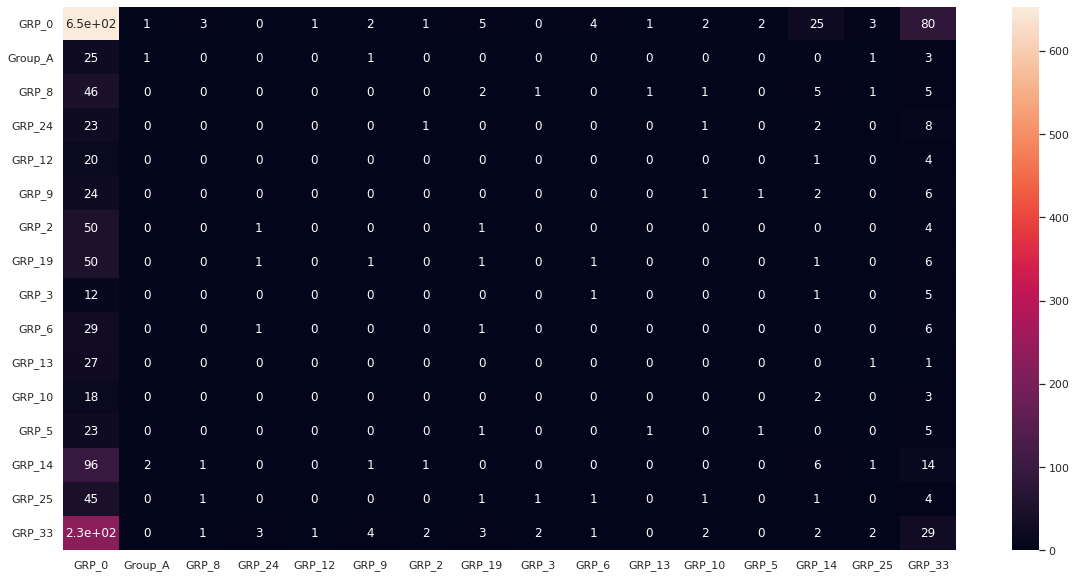

In [ ]:
classifier(LinearSVC(), X_train, X_test, y_train, y_test)

RBF SVM

Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Training accuracy: 53.75%
Testing accuracy: 46.56%
Confusion matrix:
 [[781   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2]
 [ 31   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 62   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [ 25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 60   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [ 19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [ 

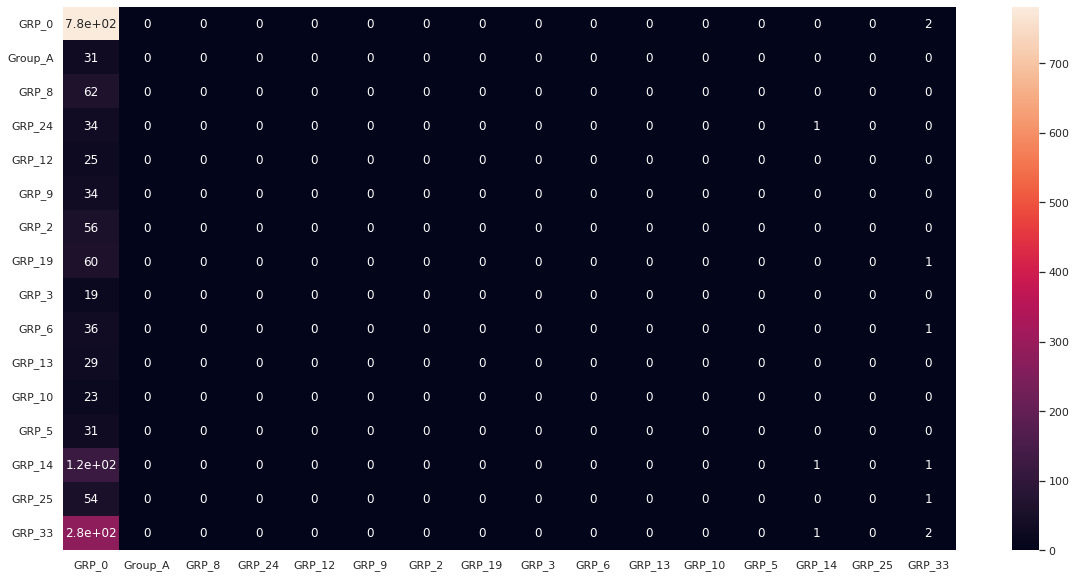

In [ ]:
classifier(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

Naive Bayes

Model: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Training accuracy: 47.24%
Testing accuracy: 46.50%
Confusion matrix:
 [[782   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [ 31   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 62   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 35   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 60   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [ 19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 37   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 29   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 23   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 31   0   0   0   0   0   0   0   0   0   0   0   0   0   

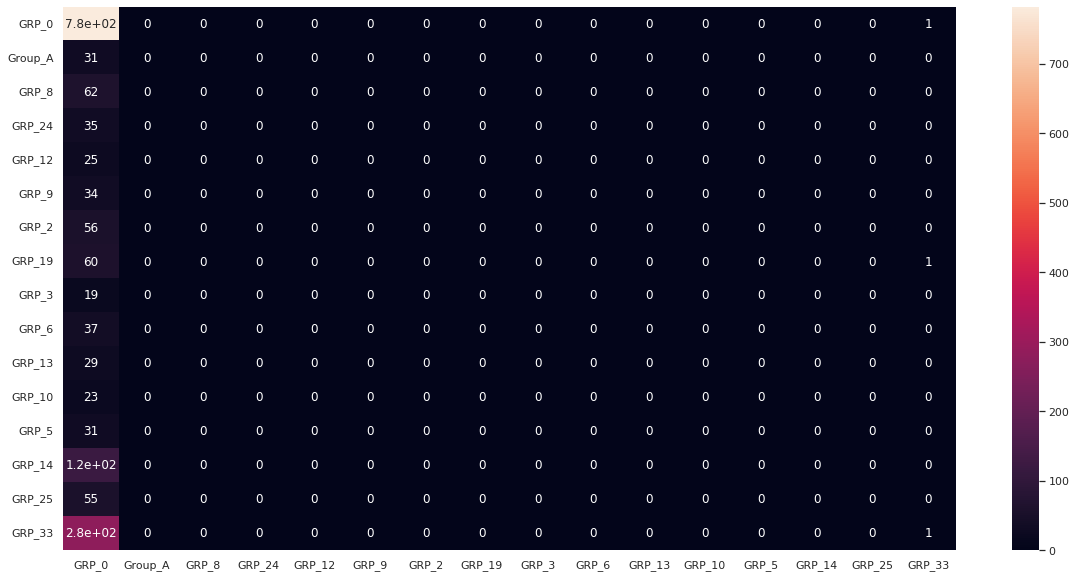

In [ ]:
classifier(MultinomialNB(), X_train, X_test, y_train, y_test)

K-Nearest neighbor(KNN)

Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Training accuracy: 51.12%
Testing accuracy: 38.66%
Confusion matrix:
 [[586   4   4   5   1   3   3   5   2   0   1   0   4  22   7 136]
 [ 24   0   1   0   0   0   0   0   0   0   0   0   0   1   1   4]
 [ 46   0   1   0   0   0   1   0   0   0   0   0   1   2   0  11]
 [ 29   0   0   0   0   1   0   0   0   0   0   0   0   0   0   5]
 [ 20   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5]
 [ 26   0   1   0   0   1   1   0   0   0   0   0   0   2   0   3]
 [ 46   0   0   0   0   0   1   0   0   0   0   0   0   2   1   6]
 [ 46   1   1   1   0   0   0   0   1   0   0   0   0   0   1  10]
 [ 14   0   0   0   0   0   0   0   0   0   0   0   0   1   0   4]
 [ 27   0   1   0   0   0   0   1   0   0   0   0   0   0   0   8]
 [ 20   1   0   0   0   0   0   1   0   0   0   1   0   0   0   6]

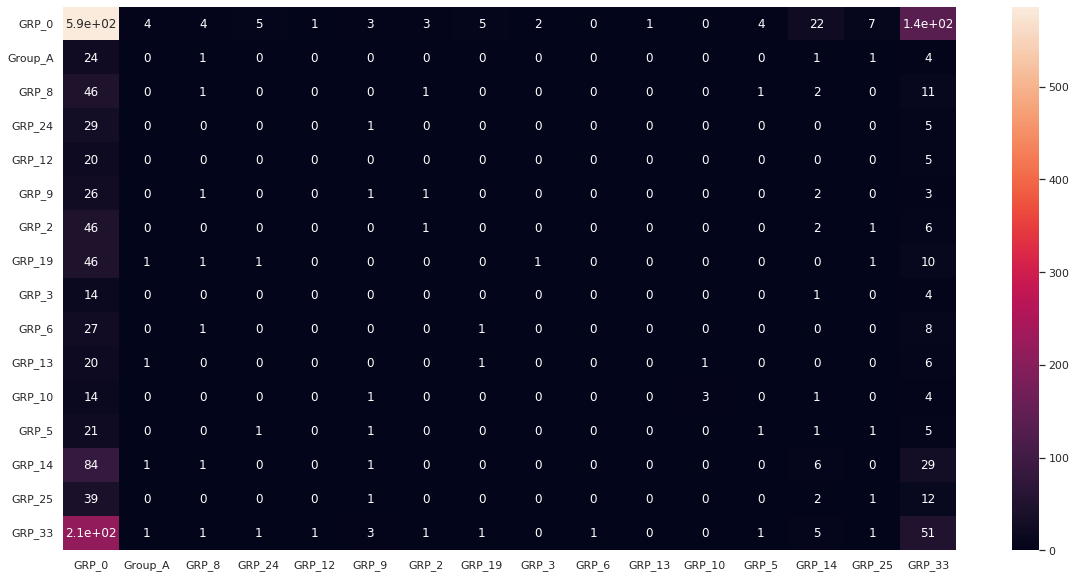

In [ ]:
classifier(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

**Observation**

*Random Forest*:  Training-95.11%; Testing-42.16%

*Decision Tree*:  Training-95.11%; Testing-32.01%

*SVM_linear*:     Training-80.22%; Testing-41.03%

*SVM_RBF*:        Training-53.75%; Testing-46.56%

*Naive Bayes*:    Training-47.24%; Testing-46.50%

*KNN*:            Training-51.12%; Testing-38.66%

We can say that the models above are overfitted heavily.

In [ ]:
# Need to do Deep Learning models
